# 불균형데이터의 예측 성능

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np

from sklearn import preprocessing, model_selection, metrics, pipeline 

# PR graph의 중요성
## Data Obtain

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


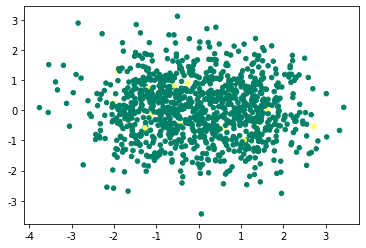

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01],
                          random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='summer')

In [ ]:
X.shape

(1000, 20)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.5, 
                                                                    random_state = 2, stratify=y)
print(f'Dataset: Class 0(음성)= {len(y[y==0])} 개, Class1(양성)={len(y[y==1])} 개')

Dataset: Class 0(음성)= 985 개, Class1(양성)=15 개


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
y_pred = clf.fit(X_train, y_train).predict(X_test)
y_probas = clf.fit(X_train, y_train).predict_proba(X_test)
target_names = ['Negative (0)', 'Positive(1)']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Negative (0)       0.99      1.00      0.99       493
 Positive(1)       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


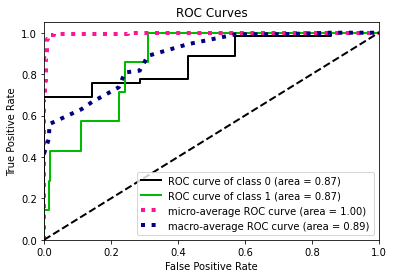

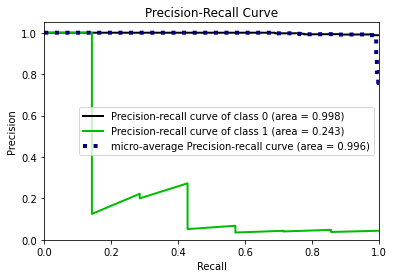

In [ ]:
! pip install scikit-plot
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

### 사이킷런 내부 모델의 의사결정임계값은 '0.5'로 예측 모델의 결과인 500개는 모두 음성으로 판정한 것을 확인할 수있으며 양성판정 비율은 모두 0.22 이하인 것으로 나타남

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Counter({0: 500})

Text(0.5, 1.0, 'DDistribution of probability of positive')

Text(0.5, 0, 'probability of positive')

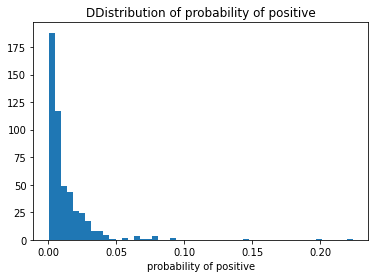

In [ ]:
from collections import Counter
Counter(y_pred)
ax = plt.hist(y_probas[:, 1], bins=50)
plt.title('DDistribution of probability of positive'); plt.xlabel('probability of positive')

## ROC와 PR curve는 다른 이야기를 하고 있으며 불균형데이터의 예측 성능지표는 AUROC보다는 PR그래프가 우수하다.
### PR 그래프는 소수 범주 자료(양성, 1%)에 집중하는 반면 ROC curve는 음성과 양성 범주 자료를 모두 고려하기 때문이다.

### 예를 들어 양성 10개 음성 100,000인 데이터의 예측 모형 A,B
- 예측모형 A : 900개를 양성으로 예측하였으나 9개만 실제 양성 
- 예측모형 B :  90개를 양성으로 예측하였으나 9개만 실제 양성
### 모델 B가 훨씬 정교하다(precise)

### 반면에 
- 예측모형 A: TPR = 9/10 = 0.9,  FPR = (900–9)/100,000 = 0.00891
- 예측모형 B: TPR = 9/10 = 0.9,  FPR = (90–9)/100,000 = 0.00081

#### TPR(recall)은 예상대로 두 모델 간에 정확히 동일하지만, 
#### 불균형데이터(음성의 비중이 양성보다 훨씬 큼)에서의 FPR 차이(0.00891–0.00081 = 0.0081)는 거의 없어지게 되어
#### ROC는 true negative가 문제와 관련이 없다는 맥락에서 Model B의 우수한 성능을 반영할 수 없습니다.

### PR 곡선에서는
- 예측모형 A: recall = TPR = 0.9,  precision = 9/900 = 0.01
- 예측모형 B: recall = TPR = 0.9,  precision = 9/90 = 0.1

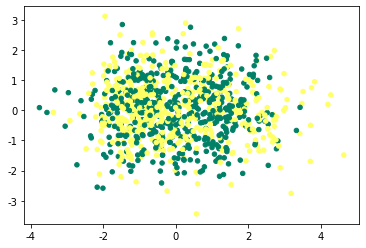

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.5, 0.5],
                          random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='summer')

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.5, 
                                                                    random_state = 2, stratify=y)

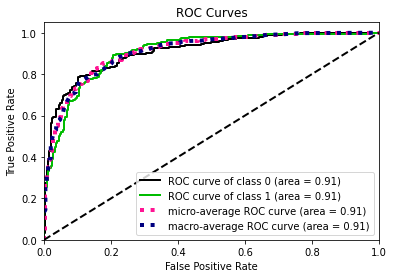

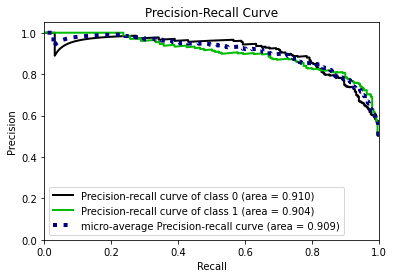

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
y_probas = clf.fit(X_train, y_train).predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

## matthews_corrcoef
- 예측 결과(predicted classes)와 실제 값(ground truth)과의 상관관계 Correlation between predicted classes and ground truth
- The MCC is in essence a correlation coefficient value between -1 and +1. 
- A coefficient of +1 represents a perfect prediction (FN=FP=0)
- 0 an average random prediction 
- -1 an inverse prediction.(TP=TN=0)
- The statistic is also known as the phi coefficient.
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/33f3d62224f97cdef8bc559ee455c3f4815f5788'>

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.0

## cohen_kappa_score
- dummy classifier(random model) 보다 얼마나 더 잘 예측 을 하는지? 
- The kappa score (see docstring) is a number between -1 and 1.
- Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/1a7a8f738ea187a60443bac93cd53b4d9d6b2231'>

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.0

## **A. 손실함수 조정**

In [ ]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = model_selection.RandomizedSearchCV(model, params, cv=5, scoring= 'recall')
y_pred = grid.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       251
           1       0.80      0.87      0.83       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [ ]:
minor = np.sum(y)/len(y); major = 1- minor
model = LogisticRegression(solver='lbfgs', class_weight= {0: minor, 1: major})
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = model_selection.RandomizedSearchCV(model, params, cv=5, scoring= 'recall')
y_pred = grid.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       251
           1       0.73      0.84      0.78       249

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.76       500
weighted avg       0.77      0.77      0.76       500



# END